In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [13]:
#Load Datasets
california=fetch_california_housing()
x=california.data
y=california.target

#Convert to dataframe
california_df=pd.DataFrame(data=np.c_[california['data'],california['target']],columns=list(california['feature_names'])+['PRICE'])

#Display the first five row of the datasets
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
#Split into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#Standardize the features by scaling them
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
#Use linear regression algorithem
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
#Predict
y_pred=lr.predict(X_test)

In [18]:
#Analyze the performance of the model
mse=mean_squared_error(y_test,y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 0.56


In [19]:
#R-squared score
r2=r2_score(y_test,y_pred)
print(f"R-squared score: {r2:.2f}")

R-squared score: 0.58


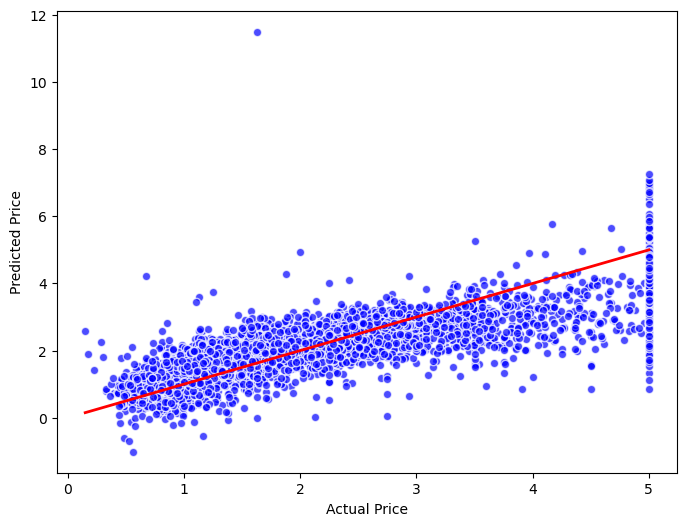

In [28]:
#Visualize the actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color="blue",edgecolors="w",alpha=0.7)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red",linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title=("Actual vs Predicted Prices")
plt.show()